以簡單線性回歸延伸，透過梯度下降法找到最佳解
* 建構環境

In [1]:
# 資料處理套件
import pandas as pd
# 構圖套件
import matplotlib.pyplot as plt
import numpy as np
# 安裝、下載並導入中文字型
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")
import matplotlib as mpl
from matplotlib.font_manager import fontManager

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=184a78fe80add8ba89d9bae4d536a190db4d71c722d5d258e3632945a2f27a81
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


* 載入與簡單線性回歸相同資料

In [2]:
data = pd.read_csv('Salary_Data.csv')
x = data['YearsExperience']
y = data['Salary']

* 建構計算梯度的函數

In [3]:
def compute_g(x, y, w, b):
  w_grad = 2 * ( x * ( w * x + b - y )).mean()  # wx+b就是y_hat
  b_grad = 2 * ( w * x + b - y ).mean()  # .mean()也可以寫成.sum()/len(x)
  return w_grad, b_grad

* 建構計算損失的函數

In [4]:
def compute_l(x, y, w, b):
  y_pred = w*x + b
  loss = (y - y_pred)**2
  loss = loss.sum()/len(x)
  return loss

* 建構優化函數

In [5]:
def grad_des(x, y, w_init, b_init, alpha, temp_loss_function, temp_grad_function, run_iter, per_iter=1000):
  l_list = []
  w_list = []
  b_list = []
  w = w_init
  b = b_init

  for i in range(run_iter):
    w_grad, b_grad = temp_grad_function(x, y, w, b)
    w = w - w_grad * alpha
    b = b - b_grad * alpha
    loss = temp_loss_function(x, y, w, b)

    w_list.append(w)
    b_list.append(b)
    l_list.append(loss)

    if i % per_iter == 0:
      print(f"Iteration {i}: loss{loss: .4e}, w{w: .2e}, b:{b: .2e},w_grad:{w_grad: .2e}, b_grad:{b_grad: .2e}")  # : .4e是取小數後四位

  return w, b, w_list, b_list, l_list

* 設定參數值，並將取代函數帶入

In [6]:
w_init = 0
b_init = 0
alpha = 0.001
run_iter = 20000
w_final, b_final, w_list, b_list, l_list = grad_des(x, y, w_init, b_init, alpha, compute_l, compute_g, run_iter)
# 值分別對應
# w = w_final, b = b_final, w_list = w_list, b_list = b_list, l_list = l_list

Iteration 0: loss 5.2861e+03, w 8.72e-01, b: 1.45e-01,w_grad:-8.72e+02, b_grad:-1.45e+02
Iteration 1000: loss 9.6020e+01, w 1.14e+01, b: 1.27e+01,w_grad: 1.22e+00, b_grad:-8.15e+00
Iteration 2000: loss 5.4275e+01, w 1.05e+01, b: 1.91e+01,w_grad: 7.18e-01, b_grad:-4.78e+00
Iteration 3000: loss 3.9926e+01, w 9.91e+00, b: 2.28e+01,w_grad: 4.21e-01, b_grad:-2.80e+00
Iteration 4000: loss 3.4993e+01, w 9.59e+00, b: 2.49e+01,w_grad: 2.47e-01, b_grad:-1.64e+00
Iteration 5000: loss 3.3298e+01, w 9.39e+00, b: 2.62e+01,w_grad: 1.45e-01, b_grad:-9.63e-01
Iteration 6000: loss 3.2715e+01, w 9.28e+00, b: 2.70e+01,w_grad: 8.48e-02, b_grad:-5.65e-01
Iteration 7000: loss 3.2515e+01, w 9.22e+00, b: 2.74e+01,w_grad: 4.97e-02, b_grad:-3.31e-01
Iteration 8000: loss 3.2446e+01, w 9.18e+00, b: 2.76e+01,w_grad: 2.92e-02, b_grad:-1.94e-01
Iteration 9000: loss 3.2422e+01, w 9.16e+00, b: 2.78e+01,w_grad: 1.71e-02, b_grad:-1.14e-01
Iteration 10000: loss 3.2414e+01, w 9.14e+00, b: 2.79e+01,w_grad: 1.00e-02, b_grad:

* 列出最終的w跟b

In [7]:
print(f"最終w,b = ({w_final: .2f}, {b_final: .2f})")  # .f是取浮點數 .e是科記

最終w,b = ( 9.12,  28.01)


* 將資料記錄到np裡面

In [8]:
ws = np.arange(-100,101)
bs = np.arange(-100,101)
loss_f = np.zeros((201,201))
i = 0
for w in ws:
  j = 0
  for b in bs:
    loss = compute_l(x, y, w, b)
    loss_f[i,j] = loss
    j = j+1
  i = i + 1
loss_f

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

* 將np紀錄的w,b,loss繪成立體圖

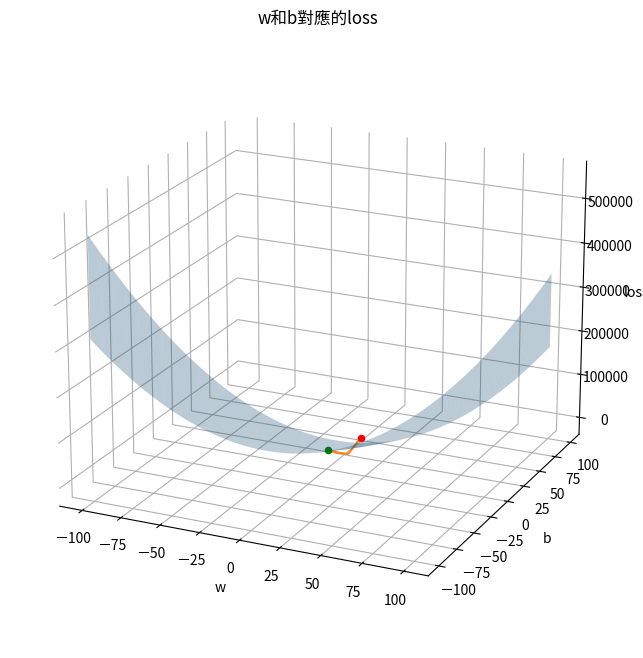

In [9]:
# 設定圖片文字
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font',family="ChineseFont")
# 設定圖片大小、3D圖與視角
plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")
ax.view_init(20,-65)
# 設定各軸網底顏色(R,G,B)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0))
b_grid, w_grid = np.meshgrid(bs, ws)
# 構圖(x, y, z, 顏色地圖, 曲面透明度)
ax.plot_surface(w_grid, w_grid, loss_f, alpha=0.3)
ax.set_title("w和b對應的loss")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("loss")
# 找出損失最小時的w與b
w_index, b_index = np.where(loss_f == np.min(loss_f))
# 點出最佳解的點
ax.scatter(ws[w_index], bs[b_index], loss_f[w_index, b_index], color="red")
# 點出起始點
ax.scatter(w_list[0], b_list[0], l_list[0], color="green")
# 繪圖
ax.plot(w_list, b_list, l_list)
plt.show()